In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'chart_studio'

In [3]:
# df films distribués en france
df = pd.read_csv('overview_fr.csv', sep=',')
# nouveau filtre sur les 5000 plus populaires
df = df.nlargest(5000, 'numVotes')
df.reset_index(drop=True, inplace=True)

from IPython.display import display
pd.options.display.max_columns = None

display(df.head())

,tconst,primaryTitle,startYear,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,genre_\N,averageRating,numVotes,title,region,actor1,actor2,actor3,actor4,actor5,actress1,actress2,actress3,actress4,actress5,director1,director2,writer1,writer2,writer3,actors_list,actresses_list,casting_list,directors_list,writers_list,originalTitle,genre1,genre2,genre3,genres_list,original_title,original_language,overview,budget,revenue,popularity,origin_country,poster_path,tmdb_id
0,tt0111161,The Shawshank Redemption,1994,142,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.3,2569002,Les Évadés,FR,Morgan Freeman,Bob Gunton,William Sadler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frank Darabont,NaN,Stephen King,NaN,NaN,"['""Morgan Freeman""', '""Bob Gunton""', '""William...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Morgan Freeman""', '""Bob Gunton""', '""William...","['""Frank Darabont""', '""nan""']","['""Stephen King""', '""nan""', '""nan""']",The Shawshank Redemption,Drama,NaN,NaN,"['""Drama""', '""nan""', '""nan""']",The Shawshank Redemption,en,"En 1947, Andy Dufresne, un jeune banquier, est...",25000000.0,2.834147e+07,96.454,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,278.0
1,tt0468569,The Dark Knight,2008,152,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.1,2534021,The Dark Knight : Le Chevalier noir,FR,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,Jonathan Nolan,David S. Goyer,Bob Kane,"['""Heath Ledger""', '""Aaron Eckhart""', '""Michae...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Heath Ledger""', '""Aaron Eckhart""', '""Michae...","['""Christopher Nolan""', '""nan""']","['""Jonathan Nolan""', '""David S. Goyer""', '""Bob...",The Dark Knight,Action,Crime,Drama,"['""Action""', '""Crime""', '""Drama""']",The Dark Knight,en,"La suite de Batman Begins, The Dark Knight, le...",185000000.0,1.004558e+09,125.591,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,155.0
2,tt1375666,Inception,2010,148,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.8,2254701,Inception,FR,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,NaN,NaN,NaN,"['""Joseph Gordon-Levitt""', '""Elliot Page""', '""...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Joseph Gordon-Levitt""', '""Elliot Page""', '""...","['""Christopher Nolan""', '""nan""']","['""nan""', '""nan""', '""nan""']",Inception,Action,Adventure,Sci-Fi,"['""Action""', '""Adventure""', '""Sci-Fi""']",Inception,en,"Dom Cobb est un voleur expérimenté, le meilleu...",160000000.0,8.255328e+08,130.588,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,27205.0
3,tt0137523,Fight Club,1999,139,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.8,2021525,Fight Club,FR,Edward Norton,Meat Loaf,Zach Grenier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Fincher,NaN,Chuck Palahniuk,Jim Uhls,NaN,"['""Edward Norton""', '""Meat Loaf""', '""Zach Gren...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Edward Norton""', '""Meat Loaf""', '""Zach Gren...","['""David Fincher""', '""nan""']","['""Chuck Palahniuk""', '""Jim Uhls""', '""nan""']",Fight Club,Drama,NaN,NaN,"['""Drama""', '""nan""', '""nan""']",Fight Club,en,"Le narrateur, sans identité précise, vit seul,...",63000000.0,1.008538e+08,66.071,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,550.0
4,tt0109830,Forrest Gump,1994,142,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.8,1981606,Forrest Gump,FR,Gary Sinise,NaN,NaN,NaN,NaN,Robin Wright,Sally Field,NaN,NaN,NaN,Robert Zemeckis,NaN,Winston Groom,Eric Roth,NaN,"['""Gary Sinise""', '""nan

In [4]:
# Dataframe avec slice de 'actor1' à 'writer3'
df.loc[:, 'actor1':'writer3'].head()

,actor1,actor2,actor3,actor4,actor5,actress1,actress2,actress3,actress4,actress5,director1,director2,writer1,writer2,writer3
0,Morgan Freeman,Bob Gunton,William Sadler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frank Darabont,NaN,Stephen King,NaN,NaN
1,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,Jonathan Nolan,David S. Goyer,Bob Kane
2,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,NaN,NaN,NaN
3,Edward Norton,Meat Loaf,Zach Grenier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Fincher,NaN,Chuck Palahniuk,Jim Uhls,NaN
4,Gary Sinise,NaN,NaN,NaN,NaN,Robin Wright,Sally Field,NaN,NaN,NaN,Robert Zemeckis,NaN,Winston Groom,Eric Roth,NaN


In [5]:
# Création de 15 dataframes (1 par colonne actor1, actor2, etc.) et concaténation en 1 seul

crew = df.loc[:, 'actor1':'writer3'] # slice de 'actor1' à 'writer3'
frames = []
role_dict = {1:'first', 2:'second', 3:'third', 4:'fourth', 5:'fifth'}

for col in crew.columns:
    job = col[:-1]                                   # job : correspond au 'actor' de 'actor1'
    role_dict_key = int(col[-1])                     # key du dict : correspond au '1' de 'actor1'
    d = df[col].to_frame()                           # transforme la colonne en df
    d.insert(1, 'role', role_dict[role_dict_key])    # ajout colonne role via le role_dict ('first' pour 1, etc)
    d.insert(2, 'job', job)                          # ajout colonne 'job'
    d = d.rename(columns={ d.columns[0]: 'name' })   # renomme la 1ère colonne du df (actor1, 2, etc) en 'name'
    frames.append(d)                                 # ajout du df à la liste frames

casting_data = pd.concat(frames)                     # concatène les 15 df de la liste
casting_data.dropna(subset=['name'], inplace=True)
casting_data

,name,role,job
0,Morgan Freeman,first,actor
1,Heath Ledger,first,actor
2,Joseph Gordon-Levitt,first,actor
3,Edward Norton,first,actor
4,Gary Sinise,first,actor
...,...,...,...
4967,Ilya Tilkin,third,writer
4975,Charles Bennett,third,writer
4986,Margret Rey,third,writer
4993,Thomas Hardy,third,writer


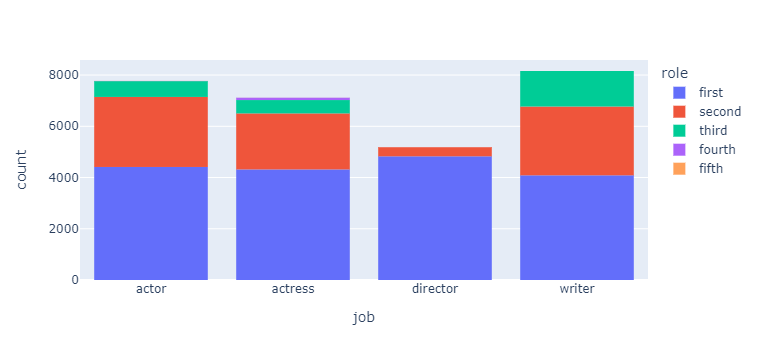

In [7]:
# Graphique - Vue d'ensemble du df
fig = px.histogram(casting_data, x="job", color='role')
fig.show()

In [8]:
casting_data.value_counts()

name                      role    job     
Nicole Kidman             first   actress     27
Steven Spielberg          first   director    26
Stephen King              first   writer      22
Keira Knightley           first   actress     21
Cate Blanchett            first   actress     21
                                              ..
Ingrid Bergman            second  actress      1
Ingrid Bisu               first   writer       1
Ingrid Olava              first   actress      1
Ingrid Thulin             second  actress      1
Øyvind B. Fabricius Holm  third   actor        1
Length: 18207, dtype: int64

In [9]:
# Ajout colonne occurences
casting_data['occur'] = casting_data.groupby('name')['name'].transform('size')

In [10]:
# Ajout colonne count
casting_data['count']=1

In [11]:
casting_data.head()

,name,role,job,occur,count
0,Morgan Freeman,first,actor,17,1
1,Heath Ledger,first,actor,6,1
2,Joseph Gordon-Levitt,first,actor,6,1
3,Edward Norton,first,actor,11,1
4,Gary Sinise,first,actor,6,1


In [12]:
casting_data.describe(include='all')

,name,role,job,occur,count
count,28232,28232,28232,28232.000000,28232.0
unique,14610,5,4,NaN,NaN
top,Luc Besson,first,writer,NaN,NaN
freq,33,17642,8158,NaN,NaN
mean,NaN,NaN,NaN,4.453882,1.0
std,NaN,NaN,NaN,4.879621,0.0
min,NaN,NaN,NaN,1.000000,1.0
25%,NaN,NaN,NaN,1.000000,1.0
50%,NaN,NaN,NaN,3.000000,1.0
75%,NaN,NaN,NaN,6.000000,1.0


In [13]:
# Pivot table sum count
table = pd.pivot_table(casting_data, values=['count'], index=['name', 'role','job', 'occur'],
                    aggfunc=np.nansum, fill_value=0)
dfg = table.reset_index()
dfg.head()

,name,role,job,occur,count
0,'A.J.' Marriot,second,writer,1,1
1,50 Cent,second,actor,2,1
2,50 Cent,third,actor,2,1
3,A. Scott Berg,second,writer,1,1
4,A.A. Milne,second,writer,2,2


In [14]:
# actresses
dfg_actress = dfg[ dfg['job']=='actress' ].sort_values('occur', ascending=False)
dfg_actress.head()

,name,role,job,occur,count
12977,Nicole Kidman,first,actress,32,27
12978,Nicole Kidman,second,actress,32,4
12979,Nicole Kidman,third,actress,32,1
2585,Cate Blanchett,first,actress,28,21
2587,Cate Blanchett,third,actress,28,2


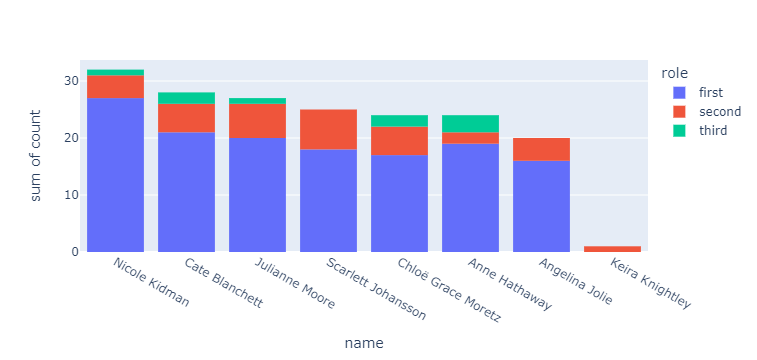

In [15]:
# Jouer sur le head() pour récupérer le top voulu (ici head(20) pour en avoir 8 )
fig = px.histogram(dfg_actress.head(20), x='name',y='count', color='role').update_xaxes(categoryorder="total descending")
fig.show()

In [16]:
# actors
dfg_actors = dfg[ dfg['job']=='actor' ].sort_values('occur', ascending=False)
dfg_actors.head()

,name,role,job,occur,count
15354,Samuel L. Jackson,first,actor,26,19
15355,Samuel L. Jackson,second,actor,26,7
1645,Ben Kingsley,first,actor,19,9
17818,Willem Dafoe,third,actor,19,1
17817,Willem Dafoe,second,actor,19,7


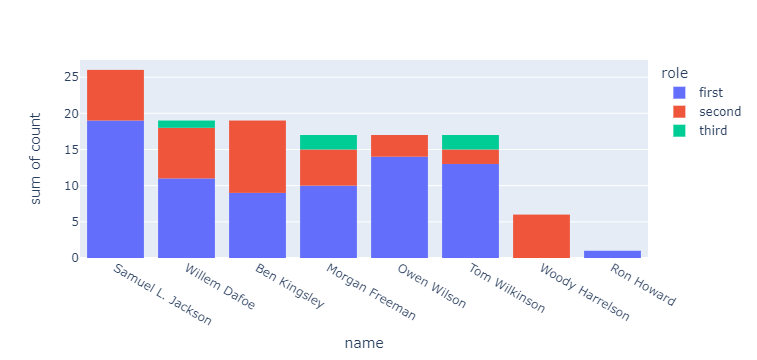

In [17]:
# Jouer sur le head() pour récupérer le top voulu
fig = px.histogram(dfg_actors.head(17), x='name',y='count', color='role').update_xaxes(categoryorder="total descending")
fig.show()